In [53]:
## For data handling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [8]:
choco = pd.read_csv("data/chocolate.csv")

In [24]:
choco.head(10)

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN
5,5,1015,A. Morin,France,2013,Venezuela,Chuao,70.0,4.00,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,oily,nut,caramel,raspberry
6,6,1019,A. Morin,France,2013,Peru,Chanchamayo Province,63.0,4.00,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sweet,cocoa,tangerine,NaN
7,7,1011,A. Morin,France,2013,Ecuador,Equateur,70.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sandy,nutty,cocoa,fig
8,8,1019,A. Morin,France,2013,Peru,Chanchamayo Province,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,sour,intense tangerine,NaN
9,9,1011,A. Morin,France,2013,Brazil,Brazil,70.0,3.25,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,mild tobacco,NaN,NaN,NaN


In [19]:
origin = choco["country_of_bean_origin"].unique()
compLoc = choco["company_location"].unique()
comp = choco["company"].unique()

In [85]:
print(choco["cocoa_butter"].value_counts('have_cocoa_butter'))
print("-------------------------------------------")
print(choco["sugar"].value_counts('have_sugar'))
print("-------------------------------------------")
print(choco["sweetener_without_sugar"].value_counts('have_sweetener_without_sugar'))
print("-------------------------------------------")
print(choco["vanilla"].value_counts('have_vanilla'))
print("-------------------------------------------")
print(choco["lecithin"].value_counts('have_lecithin'))
print("-------------------------------------------")
print(choco["salt"].value_counts('have_salt'))

have_cocoa_butter        0.690198
have_not_cocoa_butter    0.309802
Name: cocoa_butter, dtype: float64
-------------------------------------------
have_sugar        0.963129
have_not_sugar    0.036871
Name: sugar, dtype: float64
-------------------------------------------
have_not_sweetener_without_sugar    0.965827
have_sweetener_without_sugar        0.034173
Name: sweetener_without_sugar, dtype: float64
-------------------------------------------
have_not_vanila    0.843525
have_vanila        0.156475
Name: vanilla, dtype: float64
-------------------------------------------
have_not_lecithin    0.784622
have_lecithin        0.215378
Name: lecithin, dtype: float64
-------------------------------------------
have_not_salt    0.983363
have_salt        0.016637
Name: salt, dtype: float64


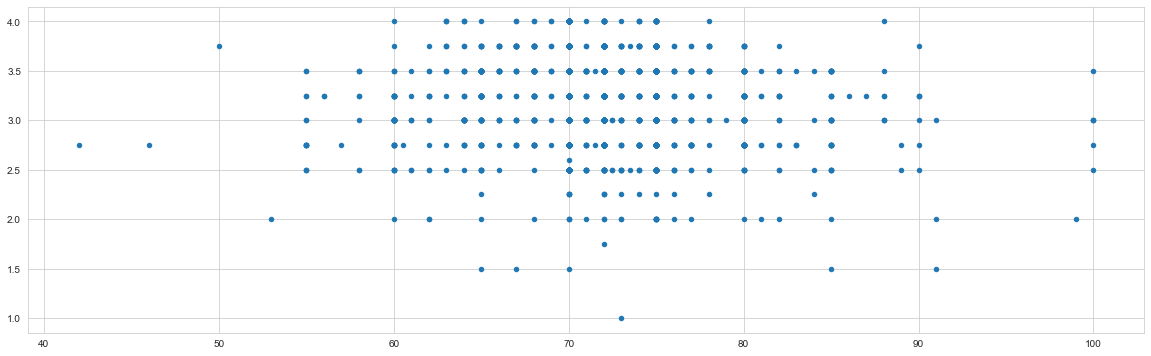

In [92]:
# silly plotting
# cocoa_percent v rating
plt.figure(figsize=(20, 6))
plt.scatter(choco["cocoa_percent"], choco["rating"], s = 20)
plt.show()
# the ratings are quite discrete...

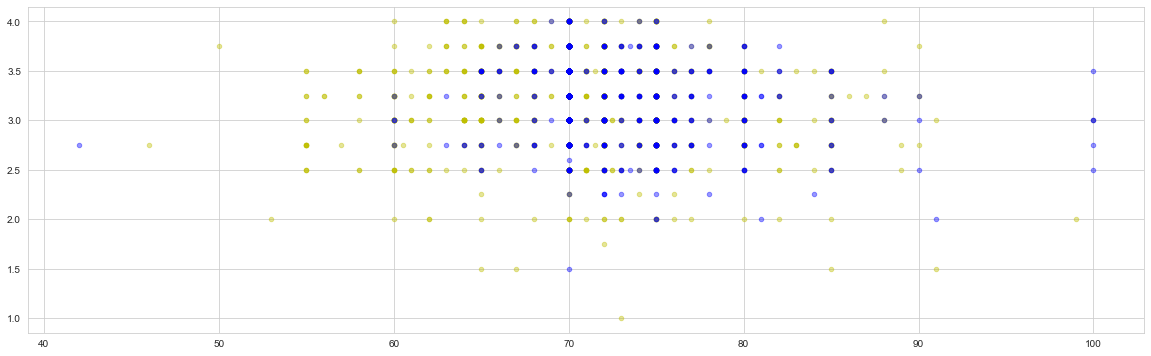

In [90]:
# cocoa_butter
plt.figure(figsize=(20, 6))
plt.scatter(choco["cocoa_percent"].loc[choco["cocoa_butter"]=="have_cocoa_butter"] 
            ,choco["rating"].loc[choco["cocoa_butter"]=="have_cocoa_butter"]
           ,color='y', alpha = 0.4, s = 20)
plt.scatter(choco["cocoa_percent"].loc[choco["cocoa_butter"]=="have_not_cocoa_butter"] 
            ,choco["rating"].loc[choco["cocoa_butter"]=="have_not_cocoa_butter"]
           ,color='b', alpha = 0.4, s = 20)
plt.show()

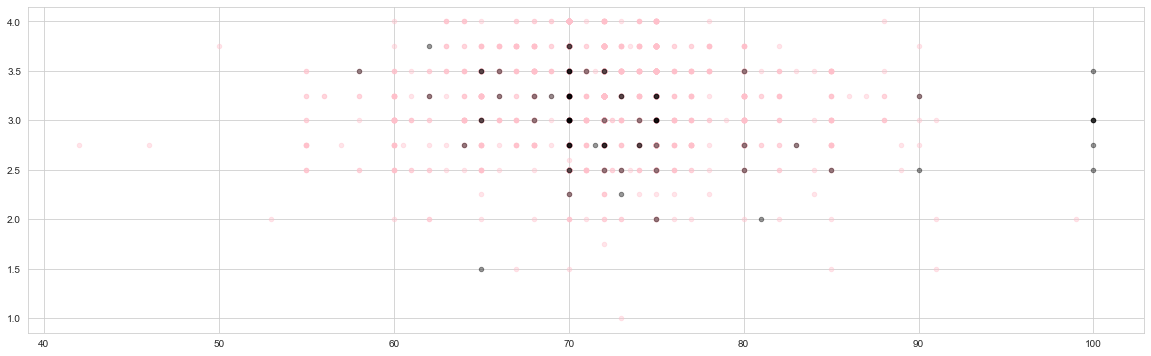

In [91]:
# sugar
plt.figure(figsize=(20, 6))
plt.scatter(choco["cocoa_percent"].loc[choco["sugar"]=="have_sugar"] 
            ,choco["rating"].loc[choco["sugar"]=="have_sugar"]
           ,color='pink', alpha = 0.4, s = 20)
plt.scatter(choco["cocoa_percent"].loc[choco["sugar"]=="have_not_sugar"] 
            ,choco["rating"].loc[choco["sugar"]=="have_not_sugar"]
           ,color='k', alpha = 0.4, s = 20)
plt.show()

